# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
df_dice = pd.DataFrame(np.random.randint(1,7, size=(10,1)))
df_dice.columns=["result"]
df_dice

,result
0,5
1,2
2,1
3,5
4,4
5,5
6,5
7,5
8,3
9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

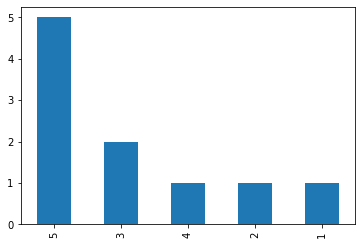

In [3]:
# your code here
df_dice["result"].value_counts().plot.bar()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

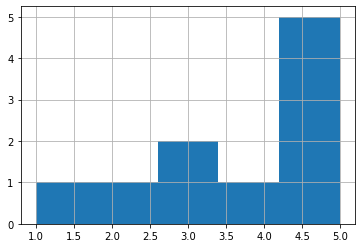

In [4]:
# your code here
df_dice["result"].hist(bins=5)

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here


mean_manual = df_dice["result"].sum()/df_dice["result"].count()
mean_manual


3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
#iterating over frequency distribution and summing all up into mean_c
mean_c=0
for items in df_dice["result"].value_counts(normalize=True).iteritems(): 
    a=items[0]*items[1] 
    mean_c+=a
print(mean_c)    
        

3.8000000000000003


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [38]:
# your code here. as index starts at 0 with use floor division to find the index of the number that is in the middle if len list
#is odd, or the average of the two number in the middle  is len list is even
result_list = df_dice["result"].tolist()
n = len(result_list) 
result_list.sort() 
  
if n % 2 == 0: 
    median1 = result_list[n//2] 
    median2 = result_list[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = result_list[n//2] 
print(median)
    


4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [52]:
# your code here
result_list = df_dice["result"].tolist()
n = len(result_list) 
result_list.sort()
q=4
if  not (n*0.25)%2 ==0 : 
    q1 = result_list[n//4]
if not (n*0.5)%2 ==0 :   
    q2 = result_list[n//2]
if not (n*0.75)%2 == 0 :    
    q3 = result_list[(n//4)+(n//2)]
    
if (n*0.25)%2 == 0: 
    q1a = result_list[n//4]
    q1b = result_list[n//4 - 1]
    q= (q1a+q1b)/2
if (n*0.5)%2 == 0:   
    q2a = result_list[n//2]
    q2b = result_list[n//2 - 1] 
    q2  = (q2a+q2b)/2
if (n*0.75)%2 == 0 :    
    q3a = result_list[(n//4)+(n//2)]
    q3b = result_list[(n//4)+(n//2) -1]
    q3  = (q3a+q3b)/2

print(q1,q2,q3)


3 5 5


In [46]:
result_list.sort()
print(result_list)

[1, 2, 3, 3, 4, 5, 5, 5, 5, 5]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

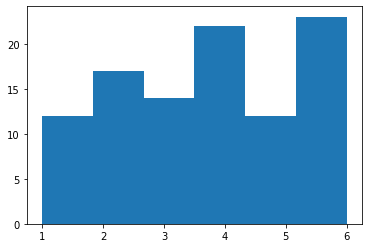

In [79]:
# your code here
roll= pd.read_csv("./roll_the_dice_hundred.csv")
roll=roll.sort_values("value")
roll.head(15)
plt.hist(roll["value"], 6)

In [11]:
"""
still a lot of variance in frequency for 100 dice roll
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [60]:
# your code here
mean_c=0
for items in roll["value"].value_counts(normalize=True).iteritems(): 
    a=items[0]*items[1] 
    mean_c+=a
print(mean_c)    
        

3.74


#### 3.- Now, calculate the frequency distribution.


In [61]:
# your code here
roll["value"].value_counts(normalize=True)

6    0.23
4    0.22
2    0.17
3    0.14
5    0.12
1    0.12
Name: value, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

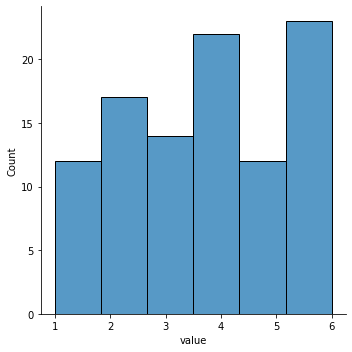

In [71]:
# your code here
sns.displot(roll["value"],bins=6)


In [15]:
"""
we have not more probability for having any number more than another but we have signigicantly more 6, hence average>>3
as we go up in rolling dice randomly the average will tend to 3.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

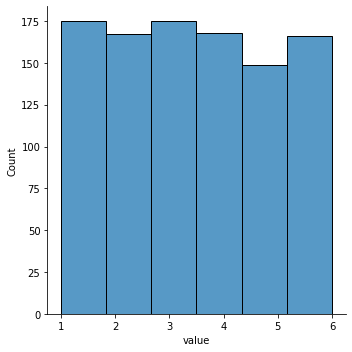

In [73]:
# your code here
roll= pd.read_csv("./roll_the_dice_thousand.csv")

sns.displot(roll["value"],bins=6)


In [17]:
"""
it is much more flattened because as we go up in sample, the variance tends to 0 in probability of having more dice result
than another. average will be much closer to 3
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [82]:
# your code here
ages= pd.read_csv("./ages_population.csv")
ages.head(20)
sns.displot(roll["value"],bins=100)
#guess would be around 35 for mean and 20 for stdev

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [83]:
# your code here
print(ages["observation"].mean())
print(ages["observation"].std())

36.56
12.81649962597677


In [20]:
"""
means fall into prediction range but stdev is lower than expected
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

28.0    0.139
27.0    0.125
26.0    0.120
29.0    0.115
25.0    0.098
30.0    0.090
24.0    0.078
31.0    0.061
23.0    0.041
22.0    0.035
32.0    0.031
33.0    0.022
21.0    0.017
20.0    0.013
34.0    0.007
35.0    0.003
19.0    0.003
36.0    0.002
Name: observation, dtype: float64


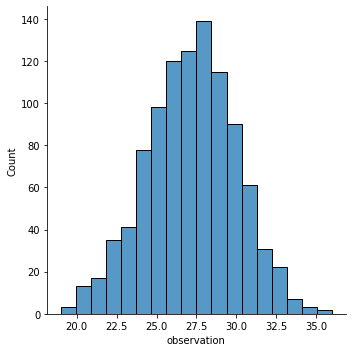

In [88]:
# your code here
ages= pd.read_csv("./ages_population2.csv")
print(ages["observation"].value_counts(normalize= True))
sns.displot(ages["observation"],bins=18)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
percentages in step1, count in histograph, symetrical distribution
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [90]:
# your code here
print(ages["observation"].mean())
print(ages["observation"].std())

27.155
2.9698139326891835


In [24]:
"""
ages average going down and stdev dropping a lot to a really low number. probably counted in a neighborood with a lot of young 
people with not a lot of children or elders
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [91]:
# your code here
ages= pd.read_csv("./ages_population3.csv")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [92]:
# your code here
print(ages["observation"].mean())
print(ages["observation"].std())

41.989
16.14470595986593


In [27]:
"""
average going up as well as stdev. probably a much diverse neighborhood with families, elders etc
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [98]:
# your code here
q1 = ages.quantile(0.25)
q2 = ages.quantile(0.5)
q3 = ages.quantile(0.75)
q4 = ages.quantile(1)
print(q1, "\n", q2, "\n", q3, "\n", q4)

md= ages["observation"].median()
me = ages["observation"].mean()
print(md, me)

observation    30.0
Name: 0.25, dtype: float64 
 observation    40.0
Name: 0.5, dtype: float64 
 observation    53.0
Name: 0.75, dtype: float64 
 observation    77.0
Name: 1, dtype: float64
40.0 41.989


In [29]:
"""
median and mean very close .When a data set has a symmetrical distribution, the mean and the median are close 
together because the middle value in the data set, when ordered smallest to largest, 
resembles the balancing point in the data, which occurs at the average.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [104]:
# your code here
pd.qcut(ages["observation"],q=10).value_counts()

(57.0, 67.0]     109
(0.999, 22.0]    108
(28.0, 32.0]     107
(36.0, 40.0]     106
(40.0, 45.0]     102
(45.0, 50.0]     101
(22.0, 28.0]      99
(32.0, 36.0]      94
(67.0, 77.0]      89
(50.0, 57.0]      85
Name: observation, dtype: int64

In [31]:
"""
calculating the deciles or q=10 the range of first decile is pretty broad. after, range is getting shorter , especially 
around mean and median. 
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'